In [3]:
# importing the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# read the data

data = pd.read_csv('CustomerChurn_dataset.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Extract the relevant features that can define a customer churn.

In [5]:
# get the shape of the data

data.shape

(7043, 21)

In [6]:
# get the data types of the columns

data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# check for missing values

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# divie into object and numeric data types

obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [9]:
obj_df.nunique()

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
#some columns have No and No phone service which are same so we will replace them with No

obj_df["MultipleLines"] = obj_df["MultipleLines"].replace("No phone service", "No")
obj_df["OnlineSecurity"] = obj_df["OnlineSecurity"].replace("No internet service", "No")
obj_df["OnlineBackup"] = obj_df["OnlineBackup"].replace("No internet service", "No")
obj_df["DeviceProtection"] = obj_df["DeviceProtection"].replace("No internet service", "No")
obj_df["TechSupport"] = obj_df["TechSupport"].replace("No internet service", "No")
obj_df["StreamingTV"] = obj_df["StreamingTV"].replace("No internet service", "No")
obj_df["StreamingMovies"] = obj_df["StreamingMovies"].replace("No internet service", "No")


In [11]:
obj_df.nunique()

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

In [12]:
# drop the customerID column since it is not useful, together with TotalCharges column since it is numeric

obj_df = obj_df.drop(['customerID', 'TotalCharges'], axis=1)
obj_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [13]:
# encode the categorical variables

for feature in obj_df.columns:
    obj_df[feature] , _ = pd.factorize(obj_df[feature])

obj_df.head()
    

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,1,1,1,0,0,0,1,1,1,0
2,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1
3,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0
4,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1


In [14]:
# get the numeric data types

num_df = data.select_dtypes(include=['int64', 'float64']).copy()
num_df.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [15]:
# add the TotalCharges column to the numeric data

num_df['TotalCharges'] = data['TotalCharges']
num_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.5
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [16]:
# check for missing values

num_df.isnull().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [17]:
# convert the TotalCharges column to numeric

num_df['TotalCharges'] = pd.to_numeric(num_df['TotalCharges'], errors='coerce')
num_df.dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [18]:
# check for missing values

num_df.isnull().sum()

SeniorCitizen      0
tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64

In [19]:
# replace the missing values with the mean

num_df['TotalCharges'] = num_df['TotalCharges'].fillna(num_df['TotalCharges'].mean())
num_df.isnull().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [20]:
# check for unique values

num_df.nunique()

SeniorCitizen        2
tenure              73
MonthlyCharges    1585
TotalCharges      6531
dtype: int64

In [21]:
# senior citizen is a categorical variable so we will convert it to object

num_df['SeniorCitizen'] = num_df['SeniorCitizen'].astype(object)
obj_df['SeniorCitizen'] = num_df['SeniorCitizen']
num_df = num_df.drop(['SeniorCitizen'], axis=1)


In [22]:
# factorize the SeniorCitizen column

obj_df['SeniorCitizen'] , _ = pd.factorize(obj_df['SeniorCitizen'])
obj_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,1,1,1,0,0,0,1,1,1,0,0
2,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0
3,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0,0
4,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0


In [23]:
# check for unique values

num_df.nunique()

tenure              73
MonthlyCharges    1585
TotalCharges      6531
dtype: int64

In [24]:
# scale the numeric data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_df_scaled = scaler.fit_transform(num_df)
num_df_scaled = pd.DataFrame(num_df_scaled, columns=num_df.columns)
num_df_scaled.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994971
1,0.066327,-0.259629,-0.173876
2,-1.236724,-0.362660,-0.960399
3,0.514251,-0.746535,-0.195400
4,-1.236724,0.197365,-0.941193


In [25]:
# merge the numeric and categorical data

data = pd.concat([num_df_scaled, obj_df], axis=1)
data.head()

,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,-1.277445,-1.160323,-0.994971,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.066327,-0.259629,-0.173876,1,1,0,1,0,0,1,1,1,0,0,0,1,1,1,0,0
2,-1.236724,-0.362660,-0.960399,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0
3,0.514251,-0.746535,-0.195400,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0,0
4,-1.236724,0.197365,-0.941193,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0


In [26]:
# divide the data into features and target

X = data.drop(['Churn'], axis=1)
y = data['Churn']

# split the data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [27]:
# choose 10 most important features using Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.DataFrame({'feature':X_train.columns, 'importance':rf.feature_importances_}).sort_values(by='importance', ascending=False)
importances.head(10)

,feature,importance
1,MonthlyCharges,0.191145
2,TotalCharges,0.190608
0,tenure,0.164674
15,Contract,0.082254
17,PaymentMethod,0.061878
8,InternetService,0.041008
16,PaperlessBilling,0.028722
3,gender,0.027585
12,TechSupport,0.023531
4,Partner,0.023123


In [28]:
# select the 10 most important features

X = importances['feature'][:10]
X = data[X]
X.head()

,MonthlyCharges,TotalCharges,tenure,Contract,PaymentMethod,InternetService,PaperlessBilling,gender,TechSupport,Partner
0,-1.160323,-0.994971,-1.277445,0,0,0,0,0,0,0
1,-0.259629,-0.173876,0.066327,1,1,0,1,1,0,1
2,-0.362660,-0.960399,-1.236724,0,1,0,0,1,0,1
3,-0.746535,-0.195400,0.514251,1,2,0,1,1,1,1
4,0.197365,-0.941193,-1.236724,0,0,1,0,0,0,1


Using EDA to find out which customer profiles relate to churning a lot(e.g senior citizen men, who have a partner and dependents churn a lot)

In [29]:
# check for class imbalance

y.value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [30]:
# we will use SMOTE to handle the class imbalance

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [31]:
# split the data into train and test sets for the oversampled data

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, stratify=y_sm, random_state=42)


In [32]:
# use smoted data

sm_data = pd.concat([X_sm, y_sm], axis=1)
sm_data.head()


,MonthlyCharges,TotalCharges,tenure,Contract,PaymentMethod,InternetService,PaperlessBilling,gender,TechSupport,Partner,Churn
0,-1.160323,-0.994971,-1.277445,0,0,0,0,0,0,0,0
1,-0.259629,-0.173876,0.066327,1,1,0,1,1,0,1,0
2,-0.362660,-0.960399,-1.236724,0,1,0,0,1,0,1,1
3,-0.746535,-0.195400,0.514251,1,2,0,1,1,1,1,0
4,0.197365,-0.941193,-1.236724,0,0,1,0,0,0,1,1


In [33]:
# data correlation

sm_data.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.236304
Partner             0.161687
gender             -0.022807
InternetService    -0.057803
TechSupport        -0.222894
TotalCharges       -0.236134
PaperlessBilling   -0.239229
PaymentMethod      -0.307092
tenure             -0.411969
Contract           -0.506892
Name: Churn, dtype: float64

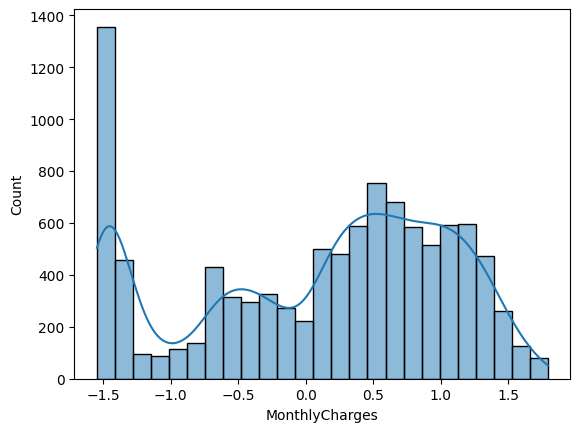

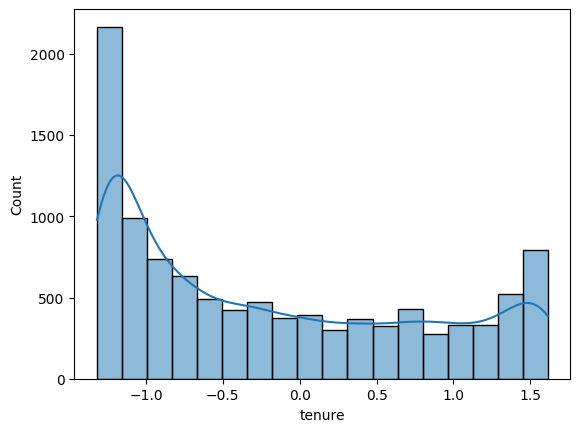

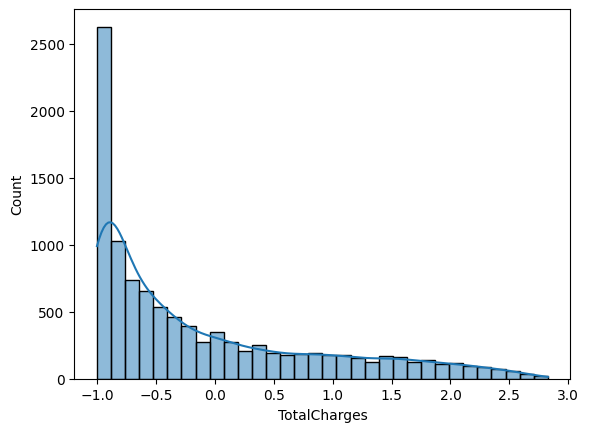

In [34]:
# contract and tenure have the highest inverse correlation with the target variable, while MonthlyCharges and Partner have the highest positive correlation with the target variable.

#univariate analysis

sns.histplot(sm_data['MonthlyCharges'], kde=True)
plt.show()


sns.histplot(sm_data['tenure'], kde=True)
plt.show()


sns.histplot(sm_data['TotalCharges'], kde=True)   
plt.show()

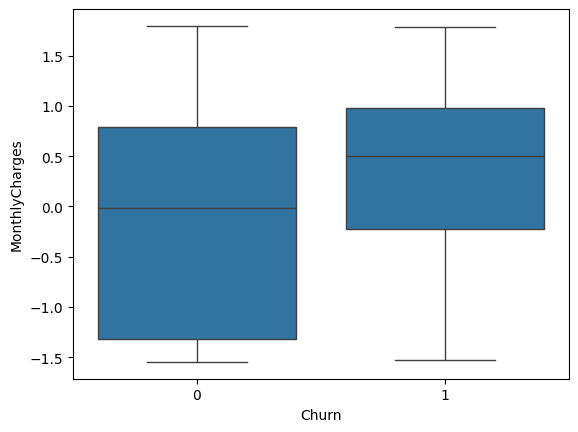

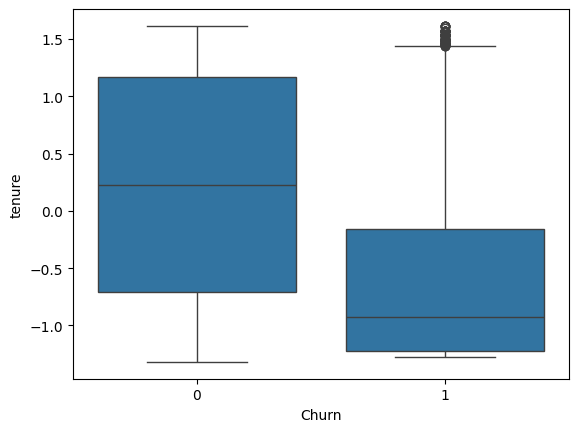

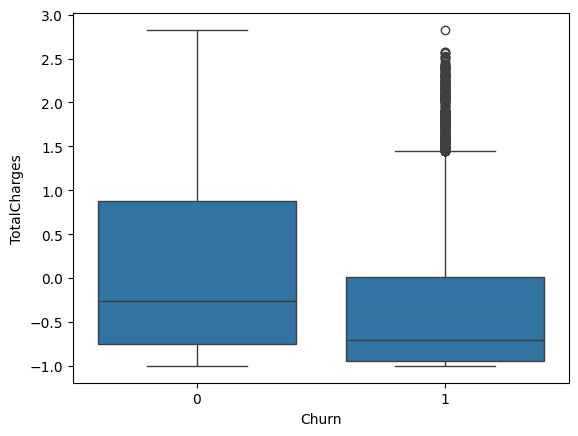

In [35]:
# bivariate analysis

sns.boxplot(x='Churn', y='MonthlyCharges', data=sm_data)
plt.show()

sns.boxplot(x='Churn', y='tenure', data=sm_data)
plt.show()

sns.boxplot(x='Churn', y='TotalCharges', data=sm_data)
plt.show()


In [36]:
# customers with higher monthly charges, lower tenure and lower total charges are more likely to churn.

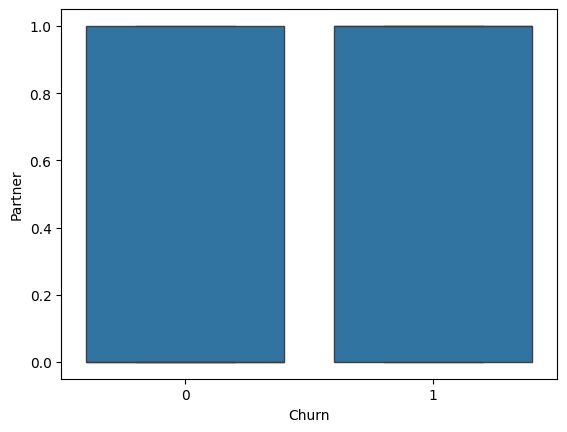

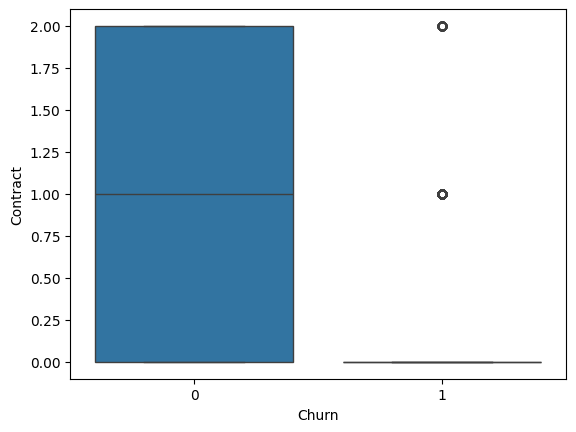

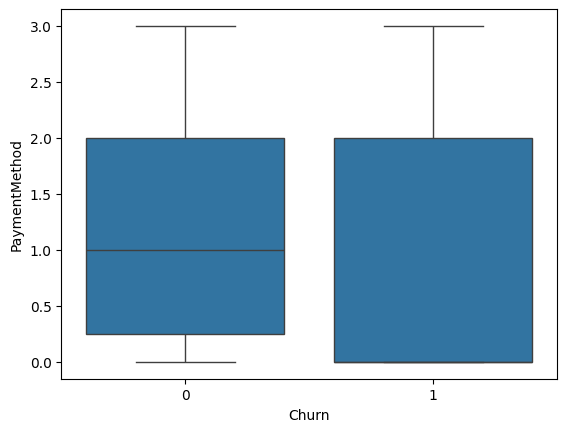

In [37]:
sns.boxplot(x='Churn', y='Partner', data=sm_data)
plt.show()

sns.boxplot(x='Churn', y='Contract', data=sm_data)
plt.show()

sns.boxplot(x='Churn', y='PaymentMethod', data=sm_data)
plt.show()

In [38]:
# customers with a contract of month-to-month, customers who pay with electronic check and customers with no partner are more likely to churn.

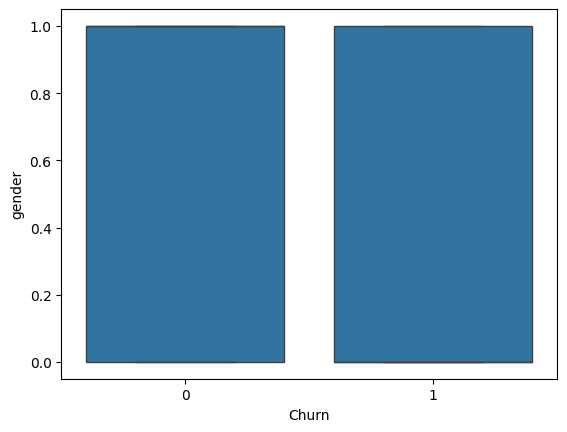

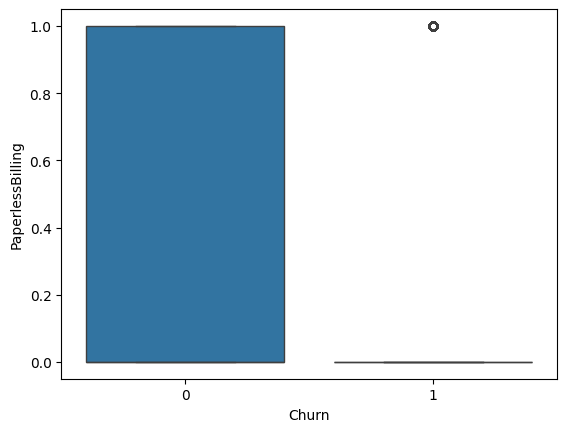

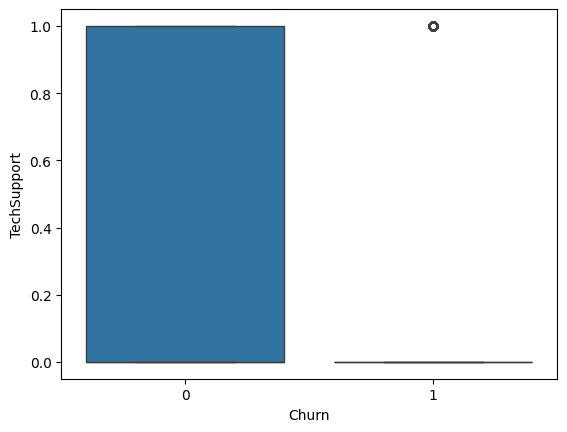

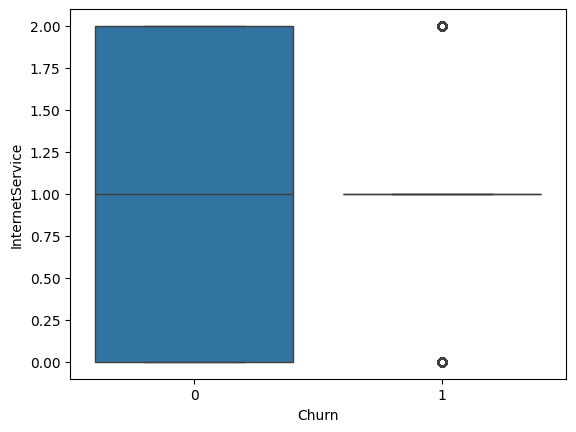

In [39]:
sns.boxplot(x='Churn', y='gender', data=sm_data)
plt.show()

sns.boxplot(x='Churn', y='PaperlessBilling', data=sm_data)
plt.show()

sns.boxplot(x='Churn', y='TechSupport', data=sm_data)
plt.show()

sns.boxplot(x='Churn', y='InternetService', data=sm_data)
plt.show()

In [40]:
# customers with tech support are more likely to stay

Training an MLP using features from (1) with cross validation and GridSearchCV

In [41]:
# implementing grid search

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras import Input
from keras.layers import Dense
from keras.optimizers import RMSprop, Adam
import keras

def create_model(learning_rate=0.01, activation='relu', neurons=3, optimizer='adam'):
    input_layer1 = Input(shape=(X_sm.shape[1],))
    input_layer2 = Dense(3, activation = activation)(input_layer1)
    output_layer1 = Dense(1, activation='sigmoid')(input_layer2)
    model = keras.Model(inputs=input_layer1, outputs=output_layer1)

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    else:
        opt = Adam(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model,learning_rate = 0.1, activation = "relu",neurons=3, epochs=25, batch_size=21, verbose=0)


param_grid = {
    'learning_rate': [0.01, 0.001],
    'activation': ['relu', 'sigmoid'],
    'neurons': [3, 6],
    'optimizer': ['adam', 'rmsprop']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_sm, y_sm)

2023-11-17 19:59:45.874858: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 19:59:48.215228: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-17 19:59:48.215331: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-17 19:59:48.533106: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-17 19:59:49.270749: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 19:59:49.272188: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [42]:
# print the results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f, Std: (%f) with: %r" % (mean, stdev, param))

Best: 0.775321 using {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 6, 'optimizer': 'adam'}
Mean: 0.773484, Std: (0.013129) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 3, 'optimizer': 'adam'}
Mean: 0.765656, Std: (0.013400) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 3, 'optimizer': 'rmsprop'}
Mean: 0.775321, Std: (0.015024) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 6, 'optimizer': 'adam'}
Mean: 0.770006, Std: (0.016039) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 6, 'optimizer': 'rmsprop'}
Mean: 0.768170, Std: (0.014657) with: {'activation': 'relu', 'learning_rate': 0.001, 'neurons': 3, 'optimizer': 'adam'}
Mean: 0.771552, Std: (0.014780) with: {'activation': 'relu', 'learning_rate': 0.001, 'neurons': 3, 'optimizer': 'rmsprop'}
Mean: 0.771262, Std: (0.011127) with: {'activation': 'relu', 'learning_rate': 0.001, 'neurons': 6, 'optimizer': 'adam'}
Mean: 0.770392, Std: (0.012592) with: {'activation': 

In [43]:
# the best parameters are learning_rate=0.01, activation='sigmoid', neurons=3, optimizer='rmsprop'	

# create the model

model = create_model(learning_rate=0.01, activation='sigmoid', neurons=3, optimizer='rmsprop')
model.summary()

Model: "model_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_50 (InputLayer)       [(None, 10)]              0         
                                                                 
 dense_98 (Dense)            (None, 3)                 33        
                                                                 
 dense_99 (Dense)            (None, 1)                 4         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


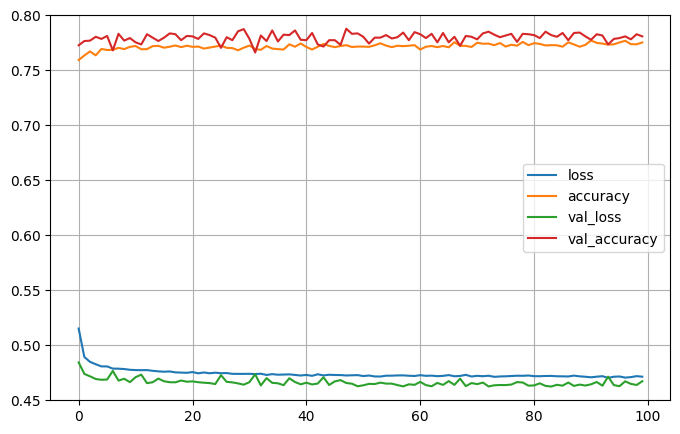

In [44]:
# splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, stratify=y_sm, random_state=42)

# fit the model

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=21, verbose=0)

# plot the learning curves

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.45, 0.8)
plt.show()

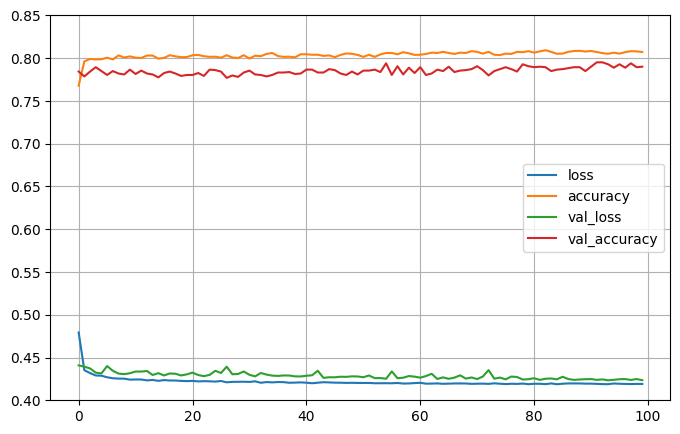

In [45]:
# training the model on unbalanced data to see which perfoms better

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = create_model(learning_rate=0.01, activation='sigmoid', neurons=3, optimizer='rmsprop')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=21, verbose=0)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.4, 0.85)
plt.show()

Evaluated the model’s accuracy, calculate the AUC score, optimised the model, train and tested again

In [46]:
# the model performs better on the un balanced data

# evaluate the model

model.evaluate(X_test, y_test)

56/56 [==============================] - 0s 821us/step - loss: 0.4235 - accuracy: 0.7899


[0.4234795868396759, 0.7898920774459839]

In [47]:
# the accuracy is 0.79

# calculating the AUC score

from sklearn.metrics import roc_auc_score

y_pred = model.predict(X_test)
roc_auc_score(y_test, y_pred)


56/56 [==============================] - 0s 2ms/step


0.8403353974363642

In [48]:
# the auc score is 0.84

# optimizing the model

# checking for multicollinearity in the data

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif


,features,VIF
0,MonthlyCharges,3.460032
1,TotalCharges,9.454907
2,tenure,6.798460
3,Contract,3.631694
4,PaymentMethod,2.422576
5,InternetService,2.361307
6,PaperlessBilling,1.896384
7,gender,1.773732
8,TechSupport,1.966253
9,Partner,2.038506


In [82]:
X.columns

Index(['MonthlyCharges', 'TotalCharges', 'tenure', 'Contract', 'PaymentMethod',
       'InternetService', 'PaperlessBilling', 'gender', 'TechSupport',
       'Partner'],
      dtype='object')

In [49]:
# doing pca for dimensionality reduction to minimize multicollinearity

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(7043, 8)

In [68]:
# the number of features has been reduced to 8

# split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, stratify=y, random_state=42)

# create the model

input_layer = Input(shape=(X_pca.shape[1],))
hidden_layer = Dense(128, activation='sigmoid')(input_layer)
hidden_layer_2 = Dense(64, activation='sigmoid')(hidden_layer)
hidden_layer_3 = Dense(32, activation='sigmoid')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = keras.Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=21, verbose=0)

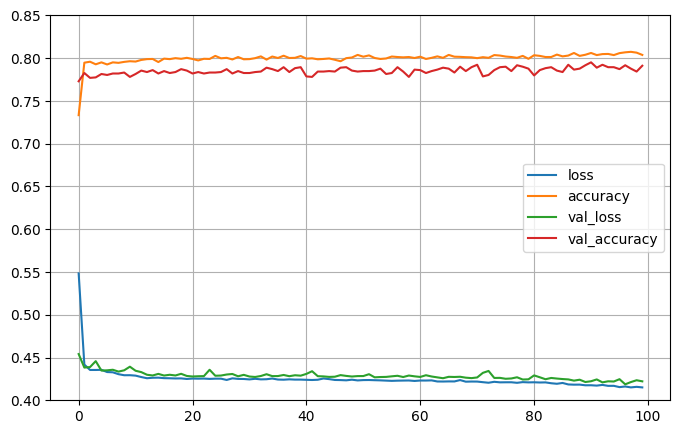

In [69]:
# plot the learning curves

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.4, 0.85)
plt.show()

In [70]:
# testing the model

model.evaluate(X_test, y_test)

56/56 [==============================] - 0s 860us/step - loss: 0.4221 - accuracy: 0.7910


[0.42214393615722656, 0.791027843952179]

In [71]:
# the accuracy increased by 0.01

# calculating the auc score

y_pred = model.predict(X_test)
roc_auc_score(y_test, y_pred)

56/56 [==============================] - 0s 764us/step


0.8404197928836435

In [72]:
# save the model

model.save('model.h5')

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [81]:
# download the scaler object and the pca object

import pickle

pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(pca, open('pca.pkl', 'wb'))